# Importing the libraries

In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Loading the dataset

In [151]:
data = pd.read_csv('/Users/benfathel/Documents/Work/PRODIGY_DS_02/titanic_data/train.csv')
data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Cleaning the dataset

## Exploring the dataset

In [153]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [154]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [155]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Handling the missing values

In [156]:
round((data.isnull().sum()/data.shape[0])*100,2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [157]:
data['Age'].mean()
data['Age'].fillna(data['Age'].mean(), inplace=True)
data['Age'].isnull().sum()


/var/folders/9s/09g1kdgn5p3fdcwfb0r_hrzh0000gn/T/ipykernel_41264/595731597.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].mean(), inplace=True)


0

In [158]:
data['Cabin'].fillna(data['Cabin'].mode()[0], inplace=True)
data['Cabin'].isnull().sum()

/var/folders/9s/09g1kdgn5p3fdcwfb0r_hrzh0000gn/T/ipykernel_41264/49455062.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Cabin'].fillna(data['Cabin'].mode()[0], inplace=True)


0

In [159]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data Visualization

## Distribution of passengers by gender

In [160]:
data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

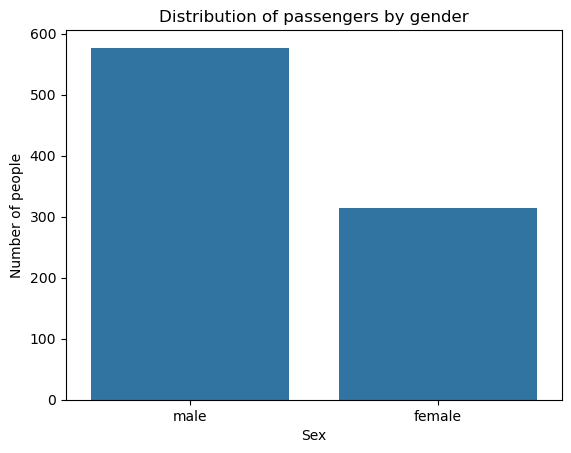

In [161]:
sns.countplot(x='Sex', data=data)
plt.title('Distribution of passengers by gender')
plt.xlabel('Sex')
plt.ylabel('Number of people')
plt.show()

## Distribution of passengers by age

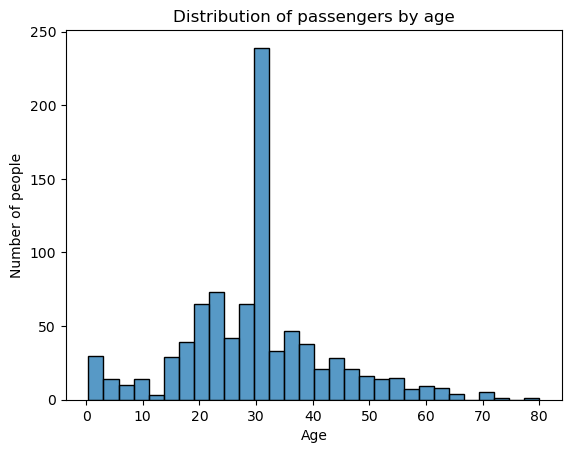

In [162]:
sns.histplot(x='Age', data=data)
plt.title('Distribution of passengers by age')
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.show()

## Distribution of passengers by passenger class

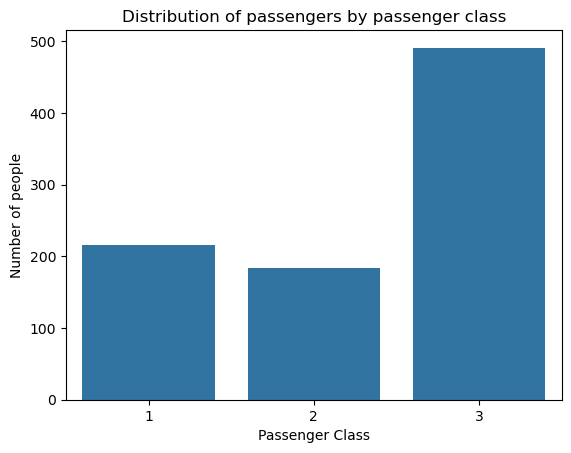

In [163]:
sns.countplot(x='Pclass', data=data)
plt.title('Distribution of passengers by passenger class')
plt.xlabel('Passenger Class')
plt.ylabel('Number of people')
plt.show()

## Survival rate

In [164]:
deaths= (data["Survived"] == 0).sum()
print("Deaths ",deaths)
survived= (data["Survived"] == 1).sum()
print("Survived ",survived)

Deaths  549
Survived  342


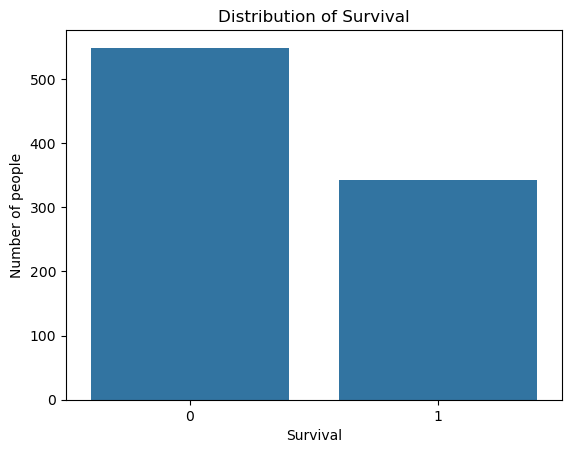

In [165]:
sns.countplot(x='Survived', data=data)
plt.title('Distribution of Survival')
plt.xlabel('Survival')
plt.ylabel('Number of people')
plt.show()

## Survival rate by gender

In [166]:
data.groupby(['Survived','Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

[Text(0.5, 1.0, ' Total number of people survived and died in gender columns')]

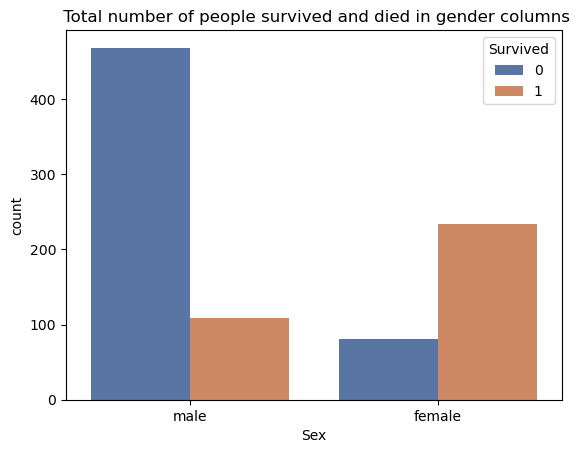

In [167]:
sns.countplot(data=data,x='Sex',hue='Survived',palette='deep').set(
title=' Total number of people survived and died in gender columns')

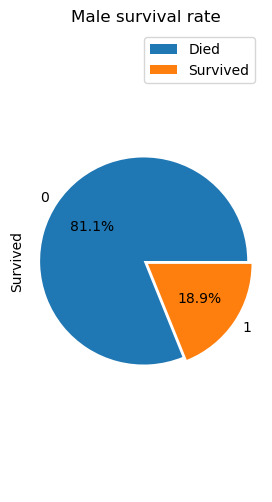

In [168]:
data[data['Sex'] == 'male'].Survived.groupby(data.Survived).count().plot(kind='pie',
figsize=(3, 6),explode=[0,0.05],autopct='%1.1f%%')
plt.axis('equal')
plt.legend(["Died","Survived"])
plt.title("Male survival rate")
plt.show()

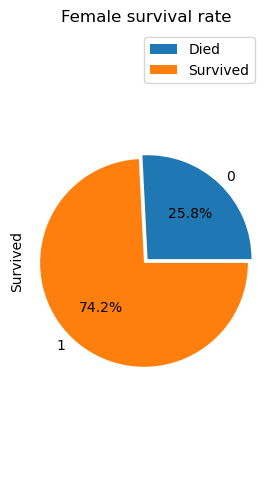

In [169]:
data[data['Sex'] == 'female'].Survived.groupby(data.Survived).count().plot(kind='pie',
figsize=(3, 6),explode=[0,0.05],autopct='%1.1f%%')
plt.axis('equal')
plt.legend(["Died","Survived"])
plt.title("Female survival rate")
plt.show()

## Survival rate by Passenger class

In [170]:
pd.crosstab(data.Pclass, data.Survived, margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<Axes: xlabel='Pclass', ylabel='count'>

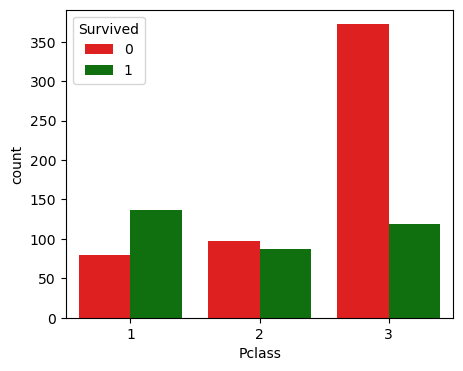

In [171]:
fig = plt.figure(figsize=(11, 4))
ax1 = fig.add_subplot(121)
sns.countplot(x = 'Pclass', hue = 'Survived', data = data, palette=["red","green"])

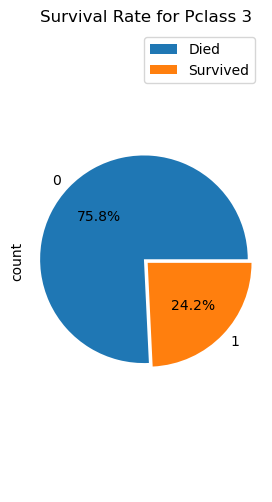

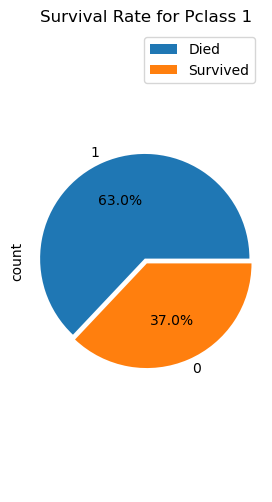

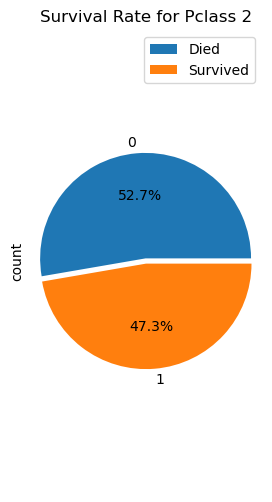

In [172]:
pclasses = data['Pclass'].unique()
for pclass in pclasses:
    pclass_data = data[data['Pclass'] == pclass].Survived.value_counts()
    plt.figure()
    pclass_data.plot(kind='pie', figsize=(3, 6), explode=[0, 0.05], autopct='%1.1f%%')
    plt.axis('equal')
    plt.legend(["Died", "Survived"])
    plt.title(f"Survival Rate for Pclass {pclass}")
    plt.show()
                       
    

## Survival rate by Gender and Passenger class

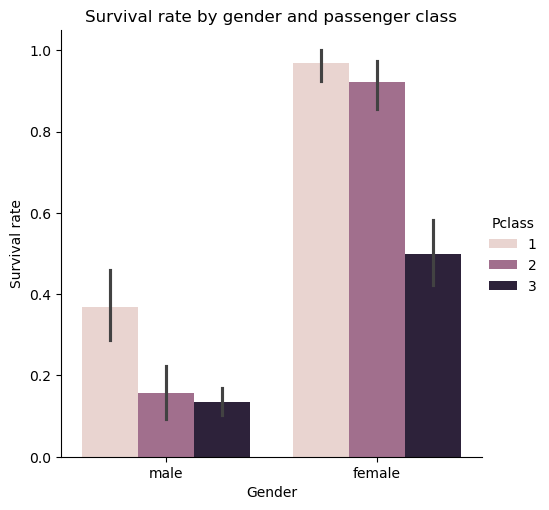

In [173]:
sns.catplot(x='Sex',y='Survived',hue='Pclass',data=data,kind='bar')
plt.title('Survival rate by gender and passenger class')
plt.xlabel('Gender')
plt.ylabel('Survival rate')
plt.show()

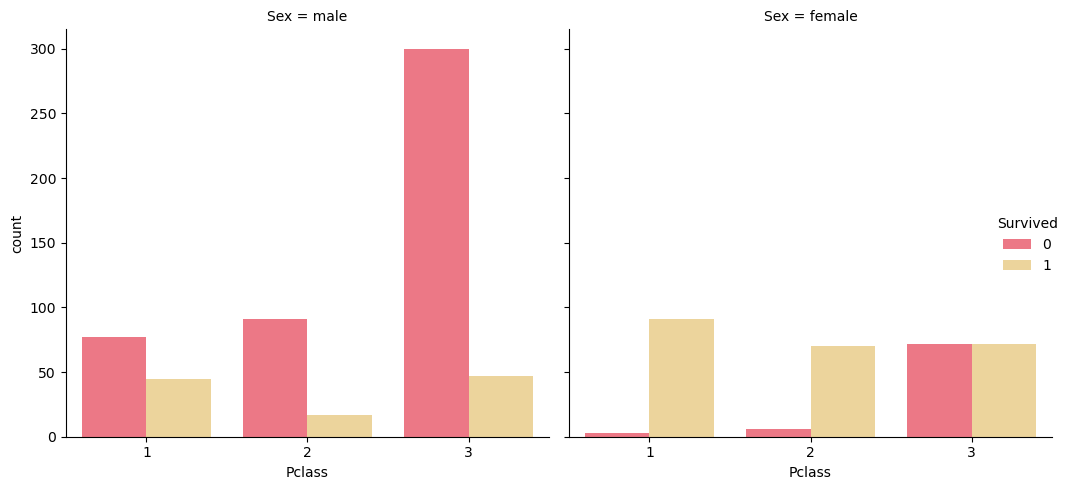

In [174]:
sns.catplot(x = 'Pclass', hue = 'Survived', col = 'Sex', kind = 'count', data = data,palette=["#ff6577", "#f9da8f"] )
plt.tight_layout()

## Survival rate by Age

/var/folders/9s/09g1kdgn5p3fdcwfb0r_hrzh0000gn/T/ipykernel_41264/1280162392.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  age_cat_pivot = data.pivot_table(index="Age_categories", values="Survived")


Text(0, 0.5, 'Survival Rate')

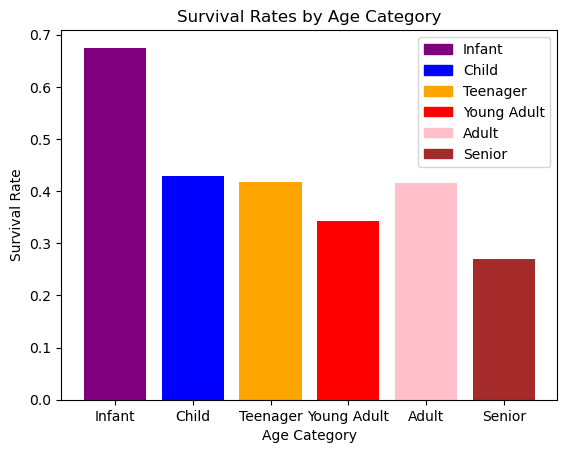

In [175]:
cut_points = [ 0, 5, 12, 20, 35, 60, 100]
label_names = [ 'Infant', "Child", 'Teenager', "Young Adult", 'Adult', 'Senior']
data['Age_categories'] = pd.cut(data['Age'], bins=cut_points, labels=label_names,right=False)
age_cat_pivot = data.pivot_table(index="Age_categories", values="Survived")
colors = ['purple', 'blue', 'orange', 'red', 'pink', 'brown']
fig, ax = plt.subplots()
bars = ax.bar(age_cat_pivot.index, age_cat_pivot['Survived'], color=colors)
handles = [plt.Rectangle((0, 0), 1, 1, color=colors[i]) for i in
range(len(colors))]
ax.legend(handles, label_names)
ax.set_title('Survival Rates by Age Category')
ax.set_xlabel('Age Category')
ax.set_ylabel('Survival Rate')

# Machine Learning

## Logistic Regression

### Working with Age, Gender and Passenger Class individually

In [176]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
y = data['Survived'].values

#### Survival Prediction Model based on Age

In [177]:
x_age = data[['Age']].values
lr.fit(x_age, y)
y_pred = lr.predict(x_age)
age_accuracy = accuracy_score(y, y_pred)
print(f"Age Accuracy: {age_accuracy}")

Age Accuracy: 0.6161616161616161


#### Survival Prediction Model based on Gender

In [178]:
x_sex = pd.get_dummies(data[['Sex']]).values
lr.fit(x_sex, y)
y_pred = lr.predict(x_sex)
sex_accuracy = accuracy_score(y,y_pred)
print(f'Sex Accuracy: {sex_accuracy}')

Sex Accuracy: 0.7867564534231201


#### Survival Prediction Model based on Passenger Class

In [179]:
x_pclass = data[['Pclass']].values
lr.fit(x_pclass, y)
y_pred = lr.predict(x_pclass)
pclass_accuracy = accuracy_score(y,y_pred)
print(f'Passenger Class Accuracy: {pclass_accuracy}')

Passenger Class Accuracy: 0.6790123456790124


#### Comparing the independent variable accuracies

In [180]:
pd.DataFrame({'Accuracy':[age_accuracy, sex_accuracy, pclass_accuracy]}, index=['Age', 'Sex', 'Pclass'])

,Accuracy
Age,0.616162
Sex,0.786756
Pclass,0.679012


### Working with all the independent variables 

In [181]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['Cabin'] = le.fit_transform(data['Cabin'])

In [187]:
x = data[['Sex', 'Age', 'Pclass', 'Cabin', 'SibSp', 'Parch']].values
y = data['Survived'].values
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=0)
lr.fit(train_x,train_y)
y_pred = lr.predict(test_x)
lr_accuracy = accuracy_score(test_y, y_pred)
print(f'Logistic Regression Accuracy: {lr_accuracy}')

Logistic Regression Accuracy: 0.8212290502793296


#### Confusion Matrix

In [183]:
labels = np.unique(test_y)
conf_matrix = confusion_matrix(test_y, y_pred, labels=labels)
pd.DataFrame(conf_matrix, index=labels, columns=labels)

,0,1
0,95,15
1,17,52


## KNN 

In [190]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_x, train_y)
y_pred = knn.predict(test_x)
knn_accuracy = accuracy_score(test_y,y_pred)
print(f'KNN Accuracy: {knn_accuracy}')

KNN Accuracy: 0.7653631284916201


## Random Forest

In [192]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(train_x, train_y)
y_pred = rfc.predict(test_x)
rfc_accuracy = accuracy_score(test_y, y_pred)
print(f'Random Forest Accracy: {rfc_accuracy}')

Random Forest Accracy: 0.7877094972067039


## Comparing the models

In [200]:
results = pd.DataFrame({'Model':['Logistic Regression', 'KNN', 'Random Forest'], 'Accuracy':[lr_accuracy, knn_accuracy, rfc_accuracy]})
sorted_results = results.sort_values(by='Accuracy', ascending=False)
sorted_results

,Model,Accuracy
0,Logistic Regression,0.821229
2,Random Forest,0.787709
1,KNN,0.765363


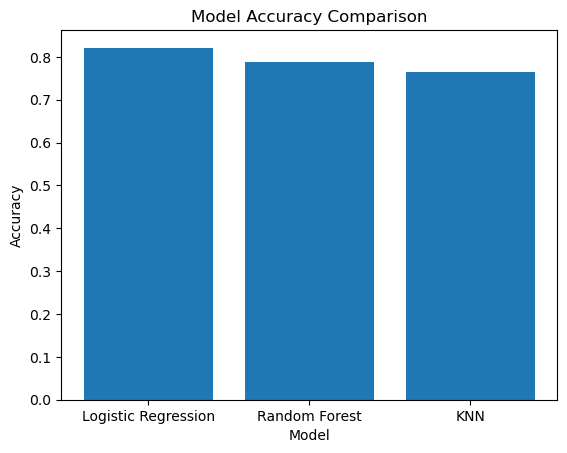

In [204]:
plt.bar(sorted_results['Model'], sorted_results['Accuracy'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()